In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sympy
import numpy as np
import torch
torch.manual_seed(12)
torch.cuda.manual_seed(12)
torch.cuda.manual_seed_all

dtype = torch.float
device = torch.device("cuda:0")


In [2]:
import sys

In [3]:
sys.path.append('/u/wangnisn/devel/machine_learning_kinetics/ml_kinetics')

In [4]:
from mlk import learning

# Set up model

In [5]:
vortex = {'eqn_type':'vortex',
        'fcn':'exp(-1/2*(x-cos(t))**2-1/2*(y-sin(t))**2)',
        'domain':{'x':[-2,2],'y':[-2,2],'t':[0,2]},
        
        'err_vec':[0,0,0,1,-1,0,0]}

u_t,u_x,u_y,u,x,y = sympy.symbols('u_t u_x u_y u x y')

dictionary = (u_x,u_y,x*u_x,y*u_x,x*u_y,y*u_y,u)
vortex['dictionary'] = dictionary
pde = vortex
domain =pde['domain']
fcn = pde['fcn']
n_points = 50000
x = sympy.symbols([x for x in domain.keys()])
u_exact = sympy.lambdify(x,sympy.sympify(fcn),'numpy')
inputs = {}
for key in domain.keys():
    min_d = domain[key][0]
    max_d = domain[key][1]
    #iputs[key] = ((max_d-min_d)*torch.rand((n_points,1),device=device,dtype=dtype,requires_grad=True)+min_d)
    tt = np.random.uniform(min_d,max_d,(n_points,1))
    inputs[key] = torch.tensor(tt,device=device,dtype=dtype,requires_grad=True)
u_exact = sympy.lambdify(x,sympy.sympify(fcn),'numpy')
u = u_exact(*[i.detach().cpu() for i in inputs.values()])
pde = {}
u = u.type(dtype).to(device)
pde['inputs'] = inputs

In [6]:
params = {'n_epochs':10000,
          'batch_size':5000,
          'alpha_pde_start':1,
           'alpha_pde_end':1,
           'alpha_l1':1e-5, 
          'warmup_nsteps':500,
          'linearRegInterval':5,
          'linearRegression':True,
          'width':50,
          'layers':8,
          'lr':0.002,
          'update_coef_in_dl':False,
          'logfile':'fixed_alpha_batch_mini.txt'}

model = learning(inputs=inputs, u=u, dictionary=dictionary,**params)


Epoch:    0,  Loss u: 4.706e-02, Loss pde: 2.556e-01, Loss_norm: 7.488e+00, Loss tot: 4.706e-02
  coefs: -5.6304e-01   -2.8970e+00    1.4370e-01   -6.2471e-01   -1.4866e+00    1.3500e+00    4.2288e-01  
Epoch:   50,  Loss u: 1.830e-04, Loss pde: 9.086e-01, Loss_norm: 7.488e+00, Loss tot: 1.830e-04
  coefs: -5.6304e-01   -2.8970e+00    1.4370e-01   -6.2471e-01   -1.4866e+00    1.3500e+00    4.2288e-01  
Epoch:  100,  Loss u: 7.876e-05, Loss pde: 9.672e-01, Loss_norm: 7.488e+00, Loss tot: 7.876e-05
  coefs: -5.6304e-01   -2.8970e+00    1.4370e-01   -6.2471e-01   -1.4866e+00    1.3500e+00    4.2288e-01  
Epoch:  150,  Loss u: 5.460e-05, Loss pde: 9.792e-01, Loss_norm: 7.488e+00, Loss tot: 5.460e-05
  coefs: -5.6304e-01   -2.8970e+00    1.4370e-01   -6.2471e-01   -1.4866e+00    1.3500e+00    4.2288e-01  
Epoch:  200,  Loss u: 6.016e-05, Loss pde: 9.461e-01, Loss_norm: 7.488e+00, Loss tot: 6.016e-05
  coefs: -5.6304e-01   -2.8970e+00    1.4370e-01   -6.2471e-01   -1.4866e+00    1.3500e+00  

Epoch: 2050,  Loss u: 3.030e-06, Loss pde: 1.437e-06, Loss_norm: 2.002e+00, Loss tot: 2.449e-05
  coefs:  1.5968e-02   -3.7487e-04   -5.2817e-04    9.9054e-01   -9.8885e-01   -1.1236e-03   -9.5525e-05  
Epoch: 2100,  Loss u: 8.214e-06, Loss pde: 2.781e-06, Loss_norm: 1.996e+00, Loss tot: 3.096e-05
  coefs:  8.4066e-03   -7.2456e-03   -1.4168e-03    9.8657e-01   -9.8529e-01    0.0000e+00    1.5067e-04  
Epoch: 2150,  Loss u: 2.344e-06, Loss pde: 1.010e-06, Loss_norm: 2.004e+00, Loss tot: 2.340e-05
  coefs:  7.8116e-03   -9.6549e-03    4.9018e-04    9.8918e-01   -9.9042e-01   -0.0000e+00    2.2318e-04  
Epoch: 2200,  Loss u: 3.085e-06, Loss pde: 1.228e-06, Loss_norm: 1.995e+00, Loss tot: 2.426e-05
  coefs:  1.3550e-02   -2.3418e-03   -2.3739e-03    9.8834e-01   -9.8564e-01   -0.0000e+00    8.0113e-05  
Epoch: 2250,  Loss u: 1.604e-06, Loss pde: 1.485e-06, Loss_norm: 1.999e+00, Loss tot: 2.308e-05
  coefs:  1.2210e-02   -7.1555e-03    6.8386e-04    9.8883e-01   -9.9073e-01   -1.5622e-03  

Epoch: 4100,  Loss u: 5.228e-06, Loss pde: 5.935e-07, Loss_norm: 1.995e+00, Loss tot: 2.577e-05
  coefs:  1.0081e-02   -4.7621e-03   -1.7945e-04    9.8793e-01   -9.8839e-01   -1.1433e-04   -1.0836e-04  
Epoch: 4150,  Loss u: 6.862e-07, Loss pde: 3.685e-07, Loss_norm: 1.990e+00, Loss tot: 2.095e-05
  coefs:  1.0896e-02   -5.5082e-03   -5.5347e-04    9.8499e-01   -9.8682e-01    1.0985e-03   -7.1492e-05  
Epoch: 4200,  Loss u: 6.682e-07, Loss pde: 5.753e-07, Loss_norm: 1.992e+00, Loss tot: 2.116e-05
  coefs:  5.4003e-03   -4.9151e-03   -1.1386e-03    9.8872e-01   -9.9092e-01    0.0000e+00    3.3055e-04  
Epoch: 4250,  Loss u: 3.727e-06, Loss pde: 9.853e-07, Loss_norm: 2.008e+00, Loss tot: 2.480e-05
  coefs:  1.2823e-02   -8.8767e-03    1.9188e-03    9.9057e-01   -9.9029e-01    1.8680e-04   -3.2604e-05  
Epoch: 4300,  Loss u: 3.552e-06, Loss pde: 3.761e-07, Loss_norm: 1.999e+00, Loss tot: 2.392e-05
  coefs:  1.3982e-02   -6.3965e-03   -2.5466e-04    9.8966e-01   -9.8631e-01    1.2610e-03  

Epoch: 6150,  Loss u: 2.090e-06, Loss pde: 9.435e-07, Loss_norm: 1.992e+00, Loss tot: 2.295e-05
  coefs:  1.0051e-02   -3.6229e-03   -6.9872e-04    9.8941e-01   -9.8895e-01   -2.2094e-04   -0.0000e+00  
Epoch: 6200,  Loss u: 1.584e-06, Loss pde: 7.726e-07, Loss_norm: 1.993e+00, Loss tot: 2.228e-05
  coefs:  4.3034e-03   -6.7431e-03    4.1102e-04    9.8808e-01   -9.9245e-01    0.0000e+00    0.0000e+00  
Epoch: 6250,  Loss u: 2.731e-06, Loss pde: 3.411e-07, Loss_norm: 1.994e+00, Loss tot: 2.301e-05
  coefs:  7.3138e-03   -2.8329e-03   -2.0031e-04    9.9279e-01   -9.9401e-01    0.0000e+00   -1.2792e-05  
Epoch: 6300,  Loss u: 1.031e-06, Loss pde: 2.119e-07, Loss_norm: 1.998e+00, Loss tot: 2.122e-05
  coefs:  6.2679e-03   -6.4535e-03    7.6002e-05    9.9064e-01   -9.9310e-01   -1.7818e-04   -1.0974e-05  
Epoch: 6350,  Loss u: 8.335e-07, Loss pde: 4.419e-07, Loss_norm: 1.996e+00, Loss tot: 2.123e-05
  coefs:  5.4190e-03   -5.8693e-03    5.9158e-05    9.9203e-01   -9.9496e-01   -0.0000e+00  

Epoch: 8200,  Loss u: 1.805e-06, Loss pde: 7.943e-07, Loss_norm: 1.993e+00, Loss tot: 2.253e-05
  coefs:  8.3984e-03   -4.8582e-03   -2.3183e-04    9.8742e-01   -9.8781e-01    1.0365e-04   -3.1683e-05  
Epoch: 8250,  Loss u: 1.802e-06, Loss pde: 5.324e-07, Loss_norm: 1.997e+00, Loss tot: 2.231e-05
  coefs:  1.2381e-02   -8.4639e-03    0.0000e+00    9.8844e-01   -9.9055e-01   -1.4379e-04    0.0000e+00  
Epoch: 8300,  Loss u: 1.231e-06, Loss pde: 3.328e-07, Loss_norm: 1.998e+00, Loss tot: 2.154e-05
  coefs:  9.3432e-03   -7.7470e-03   -1.0094e-04    9.8642e-01   -9.8938e-01   -0.0000e+00    5.4503e-05  
Epoch: 8350,  Loss u: 1.965e-06, Loss pde: 4.917e-07, Loss_norm: 1.998e+00, Loss tot: 2.243e-05
  coefs:  9.7849e-03   -8.2661e-03    0.0000e+00    9.8675e-01   -9.8885e-01   -3.8805e-04    3.4687e-05  
Epoch: 8400,  Loss u: 5.250e-07, Loss pde: 1.268e-07, Loss_norm: 1.995e+00, Loss tot: 2.060e-05
  coefs:  1.1332e-02   -6.7814e-03   -1.0827e-05    9.8762e-01   -9.8777e-01   -0.0000e+00  

In [12]:
log = pd.read_csv('fixed_alpha_batch_mini.txt')

(-1.0, 1.0)

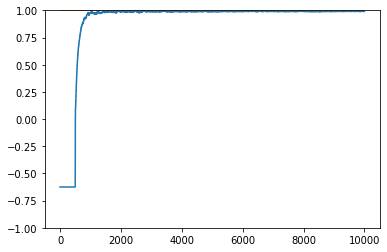

In [13]:
plt.plot(log['Epoch'].values, log['p3'].values)
plt.plot([0,10000],[1,1])
plt.ylim(-1,1)

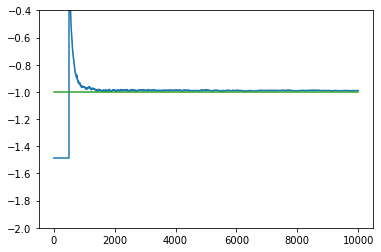

In [14]:
plt.plot(log['Epoch'], log['p4'])
plt.plot([0,10000],[1,1])
plt.ylim(-2,-0.4)
plt.plot([0,10000],[-1,-1])

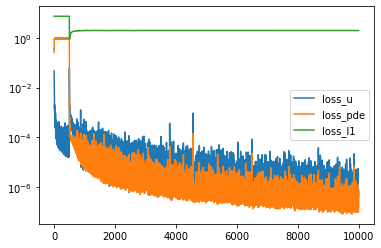

In [15]:
plt.semilogy(log['Epoch'], log['Loss_u'], label='loss_u')
plt.semilogy(log['Epoch'], log['Loss_pde'], label='loss_pde')
plt.semilogy(log['Epoch'], log['Loss_l1'], label='loss_l1')
plt.legend()

In [11]:
t_mesh = dt*np.arange(nsteps)
x_mesh = dx*np.arange(nx)
y_mesh = dy*np.arange(ny)
t_mesh, x_mesh,y_mesh = np.meshgrid(t_mesh, x_mesh, y_mesh,indexing='ij')
t_mesh = np.reshape(t_mesh, (-1,1))
x_mesh = np.reshape(x_mesh, (-1,1))
y_mesh = np.reshape(y_mesh, (-1,1))
x_mesh /= x_max
y_mesh /= y_max
t_mesh /= t_max
prediction = model(torch.cat([torch.tensor(x_mesh), torch.tensor(y_mesh), torch.tensor(t_mesh)],dim=1).double().cuda(0))

NameError: name 'dt' is not defined